<img src = "https://images2.imgbox.com/a5/72/7ZbDUHlf_o.jpg" width="200">

# Módulo - Machine Learning I
---

## Projeto - Análise do Dataset "Crédito Imóveis"

### Instruções 

Usando o [dataset do projeto](https://drive.google.com/file/d/17fyteuN2MdGdbP5_Xq_sySN_yH91vTup/view?usp=sharing), crie modelos usando Árvore de Decisão e KNN para identificar se uma pessoa será adimplente ou inadimplente, realizando os pré-processamentos necessários para cada um. Utilize a metodologia de avaliação de sua preferência, mas seu modelo será avaliado em um conjunto apartado. Que conclusões você consegue tirar a partir do modelo?

- Escolham apenas 5 variáveis dentro das 100+ disponíveis

---

### Equipe

- Mariana de Cassia Soares Nunes Cunha 
- Deborah Soares Cardoso
- Luiz Henrique Simioni Machado
- Eden de Oliveira Santana
- Luiz Gabriel de Souza

---

## Importando Bibliotecas

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from IPython.core.display import HTML

## Funções

In [ ]:
## Função para aumentar o notebook

def jupyter_settings():
   
%matplotlib inline
    %pylab inline
    plt.style.use('bmh')
    plt.rcParams['figure.figsize'] = [8,5]
    plt.rcParams['font.size'] = 24
    display(HTML('<style>.container {width:80% !important;}</style>'))
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option('display.expand_frame_repr', False)
    sns.set()

jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


In [ ]:
## Função para remover outliers

def outlier_detect(df):
    
    for i in df.describe().columns:
        Q1  = df.describe().at['25%',i]
        Q3  = df.describe().at['75%',i]
        
        IQR = Q3 - Q1
        LTV = Q1 - 1.5 * IQR
        UTV = Q3 + 1.5 * IQR
        
        x = np.array(df[i])
        p = []
        for j in x:
            if j < LTV or j > UTV:
                p.append(df[i].median())
            else:
                p.append(j)
        df[i] = p
    return df

---
## 1. Dataset Crédito Imóveis

### 1.1 Importação dos dados

In [ ]:
credito_imoveis_df = pd.read_csv('dados/application_train.csv')

In [ ]:
# O dataset possui 246008 observações e 122 variáveis
credito_imoveis_df.shape

(246008, 122)

### 1.2 Informações sobre os dados

In [ ]:
# 5 primeiras observações do dataset
credito_imoveis_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,456162,0,Cash loans,F,N,N,0,112500.0,700830.0,22738.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,134978,0,Cash loans,F,N,N,0,90000.0,375322.5,14422.5,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,3.0
2,318952,0,Cash loans,M,Y,N,0,180000.0,544491.0,16047.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,3.0
3,361264,0,Cash loans,F,N,Y,0,270000.0,814041.0,28971.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
4,260639,0,Cash loans,F,N,Y,0,144000.0,675000.0,21906.0,...,0,0,0,0,0.0,0.0,0.0,10.0,0.0,0.0


In [ ]:
# 5 últimas observações do dataset
credito_imoveis_df.tail()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
246003,242114,0,Cash loans,F,N,Y,1,270000.0,1172470.5,34411.5,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,8.0
246004,452374,0,Cash loans,F,N,Y,0,180000.0,654498.0,27859.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
246005,276545,1,Revolving loans,M,N,N,1,112500.0,270000.0,13500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
246006,236776,1,Cash loans,M,Y,N,3,202500.0,204858.0,17653.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
246007,454197,0,Cash loans,F,N,Y,2,81000.0,547344.0,23139.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,5.0


In [ ]:
# percentual de dados nulos
credito_imoveis_df.isnull().mean().round(4)*100

SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.43
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
OWN_CAR_AGE                     66.00
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.00
FLAG_PHONE  

In [ ]:
# Medidas resumo das variáveis quantitativas
credito_imoveis_df.describe(percentiles = [.25, .5, .75, .95, .99]).round(2).T.style.background_gradient(cmap='OrRd')

,count,mean,std,min,25%,50%,75%,95%,99%,max
SK_ID_CURR,246008.000000,278280.070000,102790.910000,100002.000000,189165.500000,278392.500000,367272.250000,438466.650000,452695.860000,456255.000000
TARGET,246008.000000,0.080000,0.270000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
CNT_CHILDREN,246008.000000,0.420000,0.720000,0.000000,0.000000,0.000000,1.000000,2.000000,3.000000,19.000000
AMT_INCOME_TOTAL,246008.000000,168912.160000,260381.830000,25650.000000,112500.000000,148500.000000,202500.000000,337500.000000,472500.000000,117000000.000000
AMT_CREDIT,246008.000000,599628.310000,403067.180000,45000.000000,270000.000000,514777.500000,808650.000000,1350000.000000,1870677.000000,4050000.000000
AMT_ANNUITY,245998.000000,27129.160000,14504.970000,1615.500000,16561.120000,24930.000000,34599.380000,53329.500000,69962.170000,258025.500000
AMT_GOODS_PRICE,245782.000000,538928.930000,369973.840000,40500.000000,238500.000000,450000.000000,679500.000000,1305000.000000,1800000.000000,4050000.000000
REGION_POPULATION_RELATIVE,246008.000000,0.020000,0.010000,0.000000,0.010000,0.020000,0.030000,0.050000,0.070000,0.070000
DAYS_BIRTH,246008.000000,-16042.790000,4365.970000,-25229.000000,-19691.000000,-15763.000000,-12418.000000,-9413.000000,-8264.000000,-7489.000000
DAYS_EMPLOYED,246008.000000,63963.760000,141400.320000,-17912.000000,-2758.000000,-1215.000000,-289.000000,365243.000000,365243.000000,365243.000000


---
# 2. Tratamento e Limpeza dos Dados

### 2.1

In [ ]:
# Criando uma cópia do dataset
credito_imoveis_df_copy = credito_imoveis_df.copy()

---
# 3.  Análise Exploratória dos Dados

### 3.1 Distribuição de frequência das variáveis quantitativas

### 3.2 Análise bivariada

---
# 4. Aplicação dos Modelos de Machine Learning

### 4.1 Árvore de decisão

### 4.2 KNN

**Versão 1 KNN**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from imblearn.over_sampling import SMOTE

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
from sklearn import metrics


import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
def reading_dataframe(path, sep=None):

  """ Leitura de um arquivo csv"""

  dataframe = pd.read_csv(path, sep=sep)
  return dataframe

In [4]:
df_credit_train= reading_dataframe("application_train.csv")

In [5]:
df_credit_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,456162,0,Cash loans,F,N,N,0,112500.0,700830.0,22738.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,134978,0,Cash loans,F,N,N,0,90000.0,375322.5,14422.5,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,3.0
2,318952,0,Cash loans,M,Y,N,0,180000.0,544491.0,16047.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,3.0
3,361264,0,Cash loans,F,N,Y,0,270000.0,814041.0,28971.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
4,260639,0,Cash loans,F,N,Y,0,144000.0,675000.0,21906.0,...,0,0,0,0,0.0,0.0,0.0,10.0,0.0,0.0


**Critério de seleção de variáveis**

 -  5 Maiores correlações positivas
 -  5 Menores correlações negativas

In [6]:
corr_sorting = df_credit_train.corr()['TARGET'].sort_values()

In [7]:
corr_sorting.head(n=5)

EXT_SOURCE_3    -0.179246
EXT_SOURCE_2    -0.160978
EXT_SOURCE_1    -0.158619
DAYS_EMPLOYED   -0.044862
FLOORSMAX_AVG   -0.043720
Name: TARGET, dtype: float64

In [8]:
corr_sorting.tail(n=5)

DAYS_LAST_PHONE_CHANGE         0.054471
REGION_RATING_CLIENT           0.059170
REGION_RATING_CLIENT_W_CITY    0.061518
DAYS_BIRTH                     0.079414
TARGET                         1.000000
Name: TARGET, dtype: float64

In [9]:
credit_train_5 = df_credit_train[['EXT_SOURCE_3', 'EXT_SOURCE_2','EXT_SOURCE_1',
                                  'DAYS_LAST_PHONE_CHANGE','REGION_RATING_CLIENT','TARGET']]

In [10]:
credit_train_5.shape

(246008, 6)

In [11]:
credit_train_5.head()

,EXT_SOURCE_3,EXT_SOURCE_2,EXT_SOURCE_1,DAYS_LAST_PHONE_CHANGE,REGION_RATING_CLIENT,TARGET
0,0.171468,0.699373,NaN,-589.0,2,0
1,0.768808,0.199651,0.541385,-1409.0,2,0
2,0.626304,0.704880,NaN,-675.0,2,0
3,0.810618,0.724576,NaN,-1588.0,1,0
4,0.331251,0.706310,0.592466,0.0,2,0


**Visualização dos resultados Nulos**

In [12]:
def column_empty(dataframe):

  """ Verifica as colunas que possuem dados vazios"""

  for col in (dataframe):
    if(dataframe[col].isnull().any()):
        print(col)

def values_estimate():
  return IterativeImputer()

In [13]:
column_empty(credit_train_5)

EXT_SOURCE_3
EXT_SOURCE_2
EXT_SOURCE_1
DAYS_LAST_PHONE_CHANGE


In [14]:
credit_train_5.isnull().mean().round(4)*100

EXT_SOURCE_3              19.81
EXT_SOURCE_2               0.22
EXT_SOURCE_1              56.42
DAYS_LAST_PHONE_CHANGE     0.00
REGION_RATING_CLIENT       0.00
TARGET                     0.00
dtype: float64

**Transformações nos Dados**

- Os dados possuem muitos valores nulos, portanto vamos utilizar o imputador multivariado que estima as características das outras variáveis.

In [15]:
df_credit_transf = pd.DataFrame(values_estimate().fit_transform(credit_train_5), columns = credit_train_5.columns)

In [16]:
column_empty(df_credit_transf)

In [17]:
df_credit_transf.tail()

,EXT_SOURCE_3,EXT_SOURCE_2,EXT_SOURCE_1,DAYS_LAST_PHONE_CHANGE,REGION_RATING_CLIENT,TARGET
246003,0.689479,0.701172,0.613821,-2791.0,2.0,0.0
246004,0.716570,0.364945,0.507666,-1431.0,3.0,0.0
246005,0.366453,0.285898,0.362307,-1535.0,1.0,1.0
246006,0.813917,0.390046,0.502168,-2612.0,2.0,1.0
246007,0.525091,0.679636,0.528770,-521.0,2.0,0.0


In [18]:
X = df_credit_transf.drop(['TARGET'],axis=1).values

In [19]:
y = df_credit_transf[['TARGET']].values

In [20]:
print(len(X))
print(len(y))

246008
246008


**Ajustes de classes desbalanceadas**
- Aqui é utilizada a classe SMOTE para ajustar o balanceamento dos dados.
- https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html

In [21]:
smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X, y)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=4)

In [24]:
print(len(X))       
print(len(X_train)) 
print(len(X_test)) 

246008
361660
90416


In [25]:

def TheBest_K(X_train, y_train, X_test, y_test, n):

    """Função que demonstra o melhor K"""
  

    ert = []
    for i in range(1,n):
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(X_train,y_train)
        pred_i = knn.predict(X_test)
        mae = mean_absolute_error(y_test, pred_i)
        ert.append(mae)

    plt.figure(figsize=(10,6))
    plt.plot(range(1,n),ert,color='red', linestyle='dashed', 
            marker='o',markerfacecolor='green', markersize=10)
    plt.title('Taxa de Erro vs. Valor de K')
    plt.xlabel('K')
    plt.ylabel('Taxa de Erro')
    print("Erro mínimo:-",min(ert),"em K =",ert.index(min(ert)))

    acc = []
    for i in range(1,n):
        neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
        yhat = neigh.predict(X_test)
        acc.append(metrics.accuracy_score(y_test, yhat))
        
    plt.figure(figsize=(10,6))
    plt.plot(range(1,n),acc,color = 'red',linestyle='dashed', 
            marker='o',markerfacecolor='green', markersize=10)
    plt.title('Acurácia vs. Valor de K')
    plt.xlabel('K')
    plt.ylabel('Acurácia')
    print("Acurácia Máxima:-",max(acc),"em K =",acc.index(max(acc)))


def myKNN(X_exp=None, 
        y_depend=None, 
        k_neighbors=None, 
        seed_=None, 
        percent_test:float=None,
        type_:str=None):
        
    """ Função que implementa o algoritmo KNN"""
  
    X_train, X_test, y_train, y_test = train_test_split(X_exp, y_depend, test_size=percent_test, random_state=seed_)
    
    scaler = StandardScaler()

    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    if type_ =='r':

        reg = KNeighborsRegressor(n_neighbors=k_neighbors)
        reg.fit(X_train, y_train)

        reg = KNeighborsRegressor(n_neighbors=k_neighbors)
        reg.fit(X_train, y_train)

        predict_ = reg.predict(X_test)

        mae = mean_absolute_error(y_test, predict_)
        mse = mean_squared_error(y_test, predict_)
        rmse = mean_squared_error(y_test, predict_, squared=False)

        print(f"mae: {mae}")
        print(f"mse: {mse}")
        print(f"rmse: {rmse}")
        print("\n")
        print(f"regressor score :{reg.score(X_test, y_test)}")

        return reg

    if type_ =='c':
        classf = KNeighborsClassifier(n_neighbors=k_neighbors)
        classf.fit(X_train, y_train)
        predict_ = classf.predict(X_test)

        #acc =  classf.score(X_test, y_test)
        #acc = accuracy_score(y_test, predict_)
        roc_auc = roc_auc_score(y_test, predict_)
        #print(f"Medida de acurácia: {acc}")
        print("\n")
        print(f"Métrica ROC: {roc_auc}")
        report = metrics.classification_report(y_test, predict_)
        print(report)

        return classf


Erro mínimo:- 0.07236551052910989 em K = 0
Acurácia Máxima:- 0.9276344894708901 em K = 0


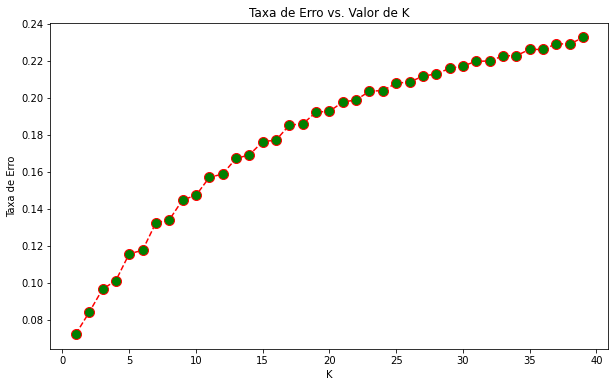

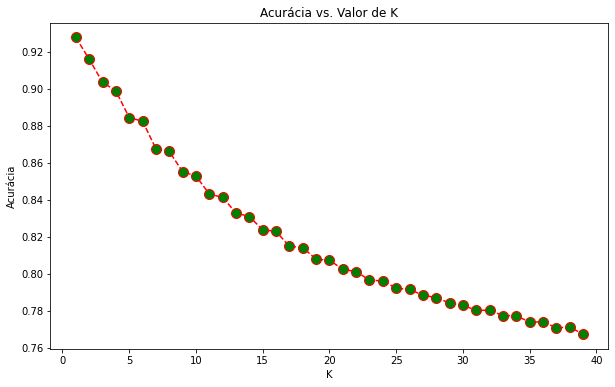

In [26]:
TheBest_K(X_train, y_train, X_test, y_test, 40)

In [27]:
myKNN(X_smote, y_smote, 5, 4, 0.2, 'c')



Métrica ROC: 0.88786007374691
              precision    recall  f1-score   support

         0.0       0.90      0.87      0.89     45148
         1.0       0.87      0.91      0.89     45268

    accuracy                           0.89     90416
   macro avg       0.89      0.89      0.89     90416
weighted avg       0.89      0.89      0.89     90416



KNeighborsClassifier()

---
# 5. Conclusões

In [ ]:
# Correlação forte entre as variáveis ( retirar depois )

thresh = 0.7

# matriz de correlação
df_corr = credito_imoveis_df.corr().abs().unstack()

# filtro
df_corr_filt = df_corr[(df_corr>thresh) | (df_corr<-thresh)].reset_index()

df_corr_filt[df_corr_filt.level_0 != df_corr_filt.level_1]

,level_0,level_1,0
3,CNT_CHILDREN,CNT_FAM_MEMBERS,0.878650
6,AMT_CREDIT,AMT_ANNUITY,0.769821
7,AMT_CREDIT,AMT_GOODS_PRICE,0.987024
8,AMT_ANNUITY,AMT_CREDIT,0.769821
10,AMT_ANNUITY,AMT_GOODS_PRICE,0.774900
11,AMT_GOODS_PRICE,AMT_CREDIT,0.987024
12,AMT_GOODS_PRICE,AMT_ANNUITY,0.774900
17,DAYS_EMPLOYED,FLAG_EMP_PHONE,0.999750
22,FLAG_EMP_PHONE,DAYS_EMPLOYED,0.999750
28,CNT_FAM_MEMBERS,CNT_CHILDREN,0.878650


---